<a href="https://colab.research.google.com/github/riacode/StanfordAI4ALL/blob/main/Complete_Project_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro: Data exploration
Welcome to your first notebook on our comp bio project! Today, we will be:

*   Getting to know and manipulate our dataset
*   Making a "baseline" classifier and evaluating our data with it!

AI4ALL Camp Day 5

Let's first think about the data we have ...



1. What is the data that we can have to differentiate cancer? What values can they take?

2. What kinds of labels can we have? Is there an inbetween case?

3. How can we measure if we did a good job with our prediction?

### Answer:


# Initializing Biology Data

### Loading the data

First, we need to load our data, and set up our environment.

First, look inside the 'data' folder!
Here, you'll find our data files. We will be mostly focused on the csv file "leukemia_ALL_AML.csv" that holds our  dataset for ALL and AML leukemia patients. Download this file to your computer and upload it to this colab notebook by running the following line and clicking "Choose Files" to upload it.

In [ ]:
#@title Run this to setup our files and download your data! Upload the leukemia_ALL_AML.csv file

#Import the common libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

# Upload the data files
from google.colab import files
uploaded = files.upload()

Saving leukemia_ALL_AML.csv to leukemia_ALL_AML.csv


Let's take a look at our data by using a library called "pandas". Pandas is awesome to look at matrix like data with a bunch of columns. Above, we already imported pandas for you (what other things have we loaded?). We have written:

`import pandas as pd `

Thus, you can call pandas by just writing pd. Pandas has a read_csv function, so let's read the csv file you just uploaded!

In [ ]:
#Load our data to a pandas dataframe
data_df = pd.read_csv('leukemia_ALL_AML.csv')

#Let's see what we just loaded!
data_df

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_5_at,AFFX-HSAC07/X00351_M_at,AFFX-HSAC07/X00351_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-HUMTFRR/M11507_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-HSAC07/X00351_3_st,AFFX-HUMGAPDH/M33197_M_st,AFFX-HUMGAPDH/M33197_3_st,AFFX-HSAC07/X00351_M_st,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000467_at,AB000468_at,AB000584_at,AB000905_at,AB001106_at,...,U22029_f_at,U49974_f_at,U65918_f_at,V00532_rna1_f_at,V00533_rna1_f_at,V01516_f_at,X13930_f_at,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,X03068_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,L10717_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,label
0,88,15091,311,21,-13,215,797,14538,9738,8529,15076,11126,17782,16287,18727,15774,264,70,298,6750,6559,2982,132,546,336,151,72,281,36,-299,57,186,1647,137,803,-632,378,-26,155,355,...,26,63,60,-20,-30,488,504,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,2762,-67,346,-68,229,108,349,61,273,384,1582,185,511,389,793,329,36,191,-37,0
1,81,25673,366,67,-179,-62,503,7953,4004,2584,9805,7327,15100,12077,19471,20134,151,-161,201,4681,3692,4329,-162,303,646,485,87,178,162,-57,197,115,2325,161,1125,-1871,-345,-190,262,309,...,-9,131,31,-23,-111,372,1176,364,-1071,150,375,549,-115,15848,17149,2447,312,816,6656,4226,1381,-109,827,29,211,15,381,-70,413,483,949,120,816,62,583,677,-1,208,10,0
2,270,49419,10,82,-206,56,654,0,-357,-481,8770,7956,12076,8121,13243,15388,306,18,254,355,1817,847,-72,169,484,381,66,131,164,-110,257,193,1993,113,607,-1037,239,-399,90,169,...,298,141,-30,-43,-100,314,605,352,-1053,123,494,435,64,11757,15267,710,298,172,7179,7117,3002,-23,821,18,303,10,553,84,226,679,1127,206,700,381,1068,412,-43,702,18,0
3,328,45815,422,-48,-195,135,267,57,-238,-337,6339,5199,9045,19541,27768,24477,149,19,229,6418,27707,622,267,-70,193,241,-38,251,98,-260,149,275,2573,168,1151,-883,-106,-685,301,111,...,330,183,142,-9,-7,429,815,429,-605,-2,603,381,2435,20818,12869,835,388,-118,16456,12103,3239,41,547,-50,156,19,420,231,246,533,2112,277,1023,214,1074,475,48,168,-70,0
4,295,20958,137,30,-589,96,373,-175,-304,-371,10756,10207,21238,9857,13271,17671,218,-8,-61,92,2029,601,257,440,660,430,4,131,68,181,70,406,1963,81,1021,-800,16,-260,79,228,...,-150,273,13,-51,-307,544,617,111,-644,117,-96,288,-23,9499,17954,569,276,-229,18764,10349,9883,-109,383,-13,303,87,212,5,325,80,1323,83,529,352,67,263,-33,-33,-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,318,23865,-14,7,216,227,722,580,130,-38,26516,17621,23892,21865,25106,18111,269,86,292,718,2371,1528,479,487,684,50,-35,74,39,436,86,107,1968,244,584,-668,572,-56,51,202,...,-46,-171,-61,-74,-204,525,512,294,119,270,172,616,559,26818,18306,1227,597,-117,16593,15921,5627,-21,386,-8,356,-3,362,203,388,432,412,234,1653,486,1293,342,26,246,23,1
68,132,45492,67,7,-79,45,372,2171,1752,904,10695,7103,16358,9628,13001,18960,432,257,331,1733,3481,1637,343,351,639,473,0,341,-7,-163,110,259,1632,33,654,-716,-199,115,108,625,...,26,43,-9,-57,-115,514,442,420,-853,26,153,278,45,10462,16721,459,228,96,7771,4972,2051,67,370,16,228,86,185,173,55,415,391,93,336,170,752,295,28,1558,-67,1
69,101,16716,172

# Data exploration

How do we know what all of the features in our dataset are? One way is to look directly at the CSV file, because these are usually the column headers that are on the first line of the file.

In [ ]:
# What values are in our dataset?
# Get the values of the columns (the features) and print them out
features = data_df.columns.values
print(features)

['AFFX-BioC-5_at' 'hum_alu_at' 'AFFX-DapX-M_at' ... 'M71243_f_at'
 'Z78285_f_at' 'label']


These feature values are called gene accession accession numbers.

You might be asking...what 'AFFX-BioC-5_at' means....
This specific one is actually a control sequence for the microarray just to make sure things are working properly.

What about 'AF000545_at'? We can take search for it on a [gene expression databank!](https://www.ncbi.nlm.nih.gov/geoprofiles/?term=AF000545_at) Typing this in, we see a short description: "P2RY10 - Skeletal muscle response to insulin infusion (HuGeneFL)".

For more info, we can click on "gene" at the bottom of the first listing, and read its description! In this case, the gene here is encodes for a protein typically expressed more in lymph nodes!

In [ ]:
#How many patient samples do we have?
numPatientSamples = data_df.shape[0] ### FILL IN ###
print(numPatientSamples)
# or
numPatientSamples = len(data_df) ### FILL IN ###
print(numPatientSamples)

72
72


In [ ]:
# How long is its gene expression profile?
lengthGeneProfile = data_df.shape[1] - 1 ### FILL IN ###
print(lengthGeneProfile)

5147


In [ ]:
# We can get the unique labels by calling "unique()" on the label column!
uniqueLabels = data_df.label.unique()
print(uniqueLabels)

[0 1]


What do these labels mean?

In [ ]:
# We can calculate counts of unique values in a particular column
# to see what the distribution of our labels are
label_counts = []
for value in uniqueLabels:
  value_counts = len( data_df.label[data_df.label == value] )
  label_counts.append(value_counts) # Appends the count of the value to a list

print('I saw label "%s" %i times' %(uniqueLabels[0], label_counts[0]))
print('I saw label "%s" %i times' % (uniqueLabels[1], label_counts[1]))

I saw label "0" 47 times
I saw label "1" 25 times


In [ ]:
# We can also do value counting by a pre-made pandas function called value counts!
label_counts = data_df.label.value_counts()
print(label_counts)
# Do these counts match with yours?

0    47
1    25
Name: label, dtype: int64


In [ ]:
# What is the majority of the labels in our dataset?
#HINT: You can use label_counts above by boolean, if/else statements ...
majority = int(label_counts[1] > 0.5 * (label_counts[0] + label_counts[1])) ### FILL IN ###
print(majority)
# or
if label_counts[1] > label_counts[0]:
  majority = 1
else:
  majority = 0
print(majority)

0
0



*   What do the values in the label column mean? 1==AML_pos
*   How many AML patient samples do we have?
*   What about ALL?
*   Does this match up with the total number of patient samples we calculated earlier?


ANSWER:


In [ ]:
# What columns have AML data?
data_df[data_df.label == 1] ### FILL IN ### ]

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_5_at,AFFX-HSAC07/X00351_M_at,AFFX-HSAC07/X00351_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-HUMTFRR/M11507_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-HSAC07/X00351_3_st,AFFX-HUMGAPDH/M33197_M_st,AFFX-HUMGAPDH/M33197_3_st,AFFX-HSAC07/X00351_M_st,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000467_at,AB000468_at,AB000584_at,AB000905_at,AB001106_at,...,U22029_f_at,U49974_f_at,U65918_f_at,V00532_rna1_f_at,V00533_rna1_f_at,V01516_f_at,X13930_f_at,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,X03068_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,L10717_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,label
47,146,15689,302,25,-209,183,657,3762,2164,1076,11955,11709,18094,16134,22495,17352,302,16,214,1030,2801,4748,379,670,687,395,73,334,73,417,259,359,2656,318,1001,-1255,575,60,44,371,...,38,114,-18,71,-194,459,548,264,-1057,221,419,304,452,23111,14331,875,278,84,12589,11076,6420,-13,111,-86,258,77,229,142,341,288,745,130,639,548,809,445,-2,210,16,1
48,141,22818,46,26,-203,25,264,104,-159,120,10245,14968,20096,8175,16573,20322,215,93,152,142,1562,962,7,133,133,316,0,105,104,-76,38,261,1397,60,675,-581,267,-191,47,257,...,-137,96,58,-29,-142,457,326,179,-498,285,183,338,309,18694,17825,222,316,162,11943,8893,3271,-52,483,-21,223,29,133,386,236,222,588,92,532,239,707,354,-22,260,5,1
49,396,36915,149,-17,-273,73,353,-56,-442,-244,14081,14764,18201,23622,31262,28813,314,-91,305,4,448,970,-112,158,396,145,49,65,47,-268,69,136,2316,73,1521,-988,238,-1200,244,481,...,-283,101,26,-49,-114,489,793,383,-1393,329,364,407,1759,22688,24920,925,210,78,15969,8201,2371,114,747,15,262,45,403,88,335,305,485,342,970,240,1111,459,-8,73,-41,1
50,31,31022,133,25,-233,22,377,-63,-269,-225,15080,18761,21628,24538,33580,25423,210,-38,196,68,490,1573,28,199,236,402,82,191,11,-42,201,90,1502,87,661,-629,295,-204,122,256,...,34,118,11,-6,-125,122,291,122,-191,264,204,234,53,21466,20371,1233,249,-80,8353,5286,1161,-58,128,12,77,-23,71,63,264,134,486,157,334,242,87,98,-26,153,-49,1
51,178,38690,104,62,-288,-33,316,-112,-261,-227,15277,20230,23591,15020,21282,16637,139,-11,94,78,929,740,161,294,229,163,64,131,29,-53,64,82,1481,66,479,-251,192,-397,100,208,...,72,49,68,-45,80,461,402,188,-597,80,145,302,265,15490,23151,972,145,45,4186,3789,1118,15,509,-13,153,33,188,137,186,196,398,133,430,261,507,64,-11,198,-33,1
52,319,31068,163,70,163,210,757,-104,-296,-308,11457,15696,19866,23593,31534,26920,179,-71,216,-51,790,1039,126,18,137,120,3,252,68,341,180,210,1783,116,910,-515,394,-316,70,210,...,143,54,51,113,-46,205,512,213,969,102,160,344,366,24089,19589,777,171,43,7534,7334,1108,45,392,-49,32,57,254,300,166,121,578,118,244,462,618,308,0,196,20,1
53,314,18595,173,-31,130,166,468,-225,-677,-177,23636,14007,19127,17465,21896,14056,364,162,714,115,851,748,470,334,510,472,-20,183,29,-6,81,78,1978,108,815,-1082,376,11,83,338,...,-181,74,75,2,-159,677,557,295,-422,582,157,759,418,18486,15769,1583,294,-111,13668,14650,16454,2,245,-5,209,10,200,122,231,138,190,134,690,331,882,264,73,315,7,1
54,170,37749,295,36,-8,144,309,1914,211,492,20667,20836,25327,12524,15017,11446,470,335,772,1182,2204,697,406,450,211,430,-48,124,-22,-42,18,217,1617,124,748,-1597,90,-199,76,243,...,14,42,54,-24,-203,567,181,265,-750,311,172,430,1102,9228,23947,1076,257,410,6923,9137,1166,18,168,26,237,82,164,56,207,168,382,146,621,295,1110,174,8,533,-4,1
55,309,19266,171,-29,97,349,789,13

#Data Visualization
### Now that we have a handle on what the values in our data mean, the next step is to visualize the data to see if we can observe some trends.  

Here we've written the function for you to plot a heatmap with a horizontal green line through the map. This should differentiate your data from AML amd ALL patient samples!

In [ ]:
def plot_heatmap(df, title, xlabel, ylabel, figsize=(15,10), datasplit=47):
    '''
    df: data frame to plot heatmap
    title:  Title for the plot
    xlabel , ylabel: Label titles to write int.
    figsize: size of the figure to plot. Default provided.
    datasplit: Line to split the data at and draw green line. Default is 47.
    '''
    plt.figure(figsize=figsize)
    ax = sns.heatmap(df, cmap=sns.color_palette("RdBu_r", 100)) #, vmin=-1000, vmax=6000)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.hlines([datasplit], *ax.get_xlim(), colors="g") # horizontal green line at the 47th row! Why 47 here?
    plt.show()

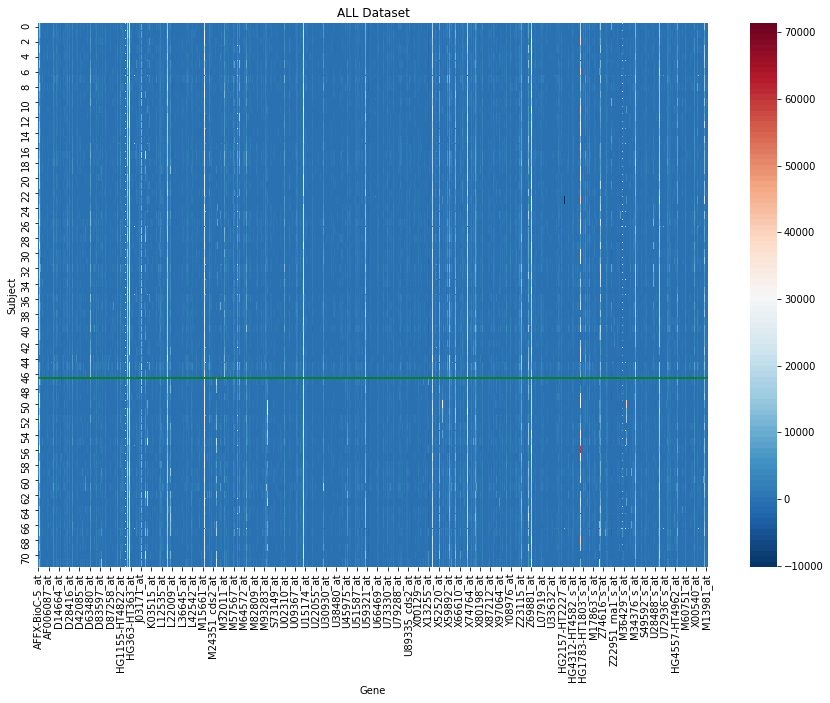

In [ ]:
#Call the above function to plot a heatmap of our data!

# plot_heatmap(### FILL IN ### )
plot_heatmap(data_df, "ALL Dataset", "Gene", "Subject", figsize=(15,10))

## Do you notice anything about the similarities in gene expression profiles?
## What about the differences?

Answer:

It's hard to gauge how different certain genes are  when the scales of other gene are much larger!

QUESTION: Which genes are particularly saturating our signal? You can take a look by printing out the dataframe again or scrolling up to when we last printed out.


Since we're comparing genes, it is really useful to calculate the "Normalized Expression". That is, each gene is normalized across the samples such that the mean is 0 and the standard deviation is 1. We can do this by the following equation:

Normalized_expression = (data - mean) / std

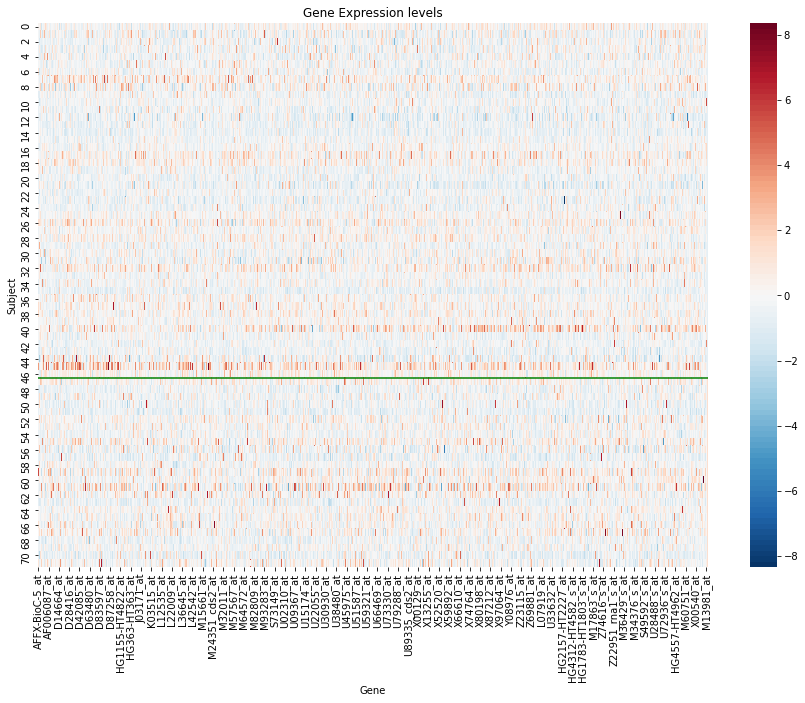

In [ ]:
# TODO: Normalization visualization
# hint: pandas dataframes also have functions mean() and std!
# You can get ther mean of a dataframe,  df,  by called df.mean()
data_df_norm =  (data_df - data_df.mean()) / data_df.std() ### FILL IN ###
plot_heatmap(data_df_norm, "Gene Expression levels", "Gene", "Subject")

Hmm...maybe its still hard to tell!
To look more closely, we can zoom into a certain subset of genes that seem interesting.

Question: Can you find any columns that are show some differences?

['AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_at', 'AB003177_at', 'AB003698_at', 'AB004884_at', 'AB006190_at', 'AC000061_cds2_at', 'AC000064_cds1_at', 'AC000064_cds2_at', 'AC000066_at', 'AC000099_at', 'AC002045_xpt1_at', 'AC002073_cds1_at', 'AC002086_at', 'AC002115_cds1_at', 'AC002115_cds3_at', 'AC002115_rna2_at', 'AC002464_at', 'AC002486_at', 'AD000092_cds1_at', 'AF000177_at', 'AF000231_at', 'AF000430_at', 'AF000545_at', 'AF000560_at', 'AF002020_at', 'AF002700_at', 'AF005037_at', 'AF005043_at', 'AF005775_at', 'AF005887_at', 'AF006041_at', 'AF006084_at', 'AF006087_at', 'AF007111_at', 'AF007551_at', 'AF007875_at', 'AF008445_at', 'AF008937_at', 'AF009301_at', 'AF009368_at', 'AF009426_at', 'AF009674_at', 'AF010193_at', 'AF014958_at', 'AF015910_at', 'AF015913_at', 'AJ000480

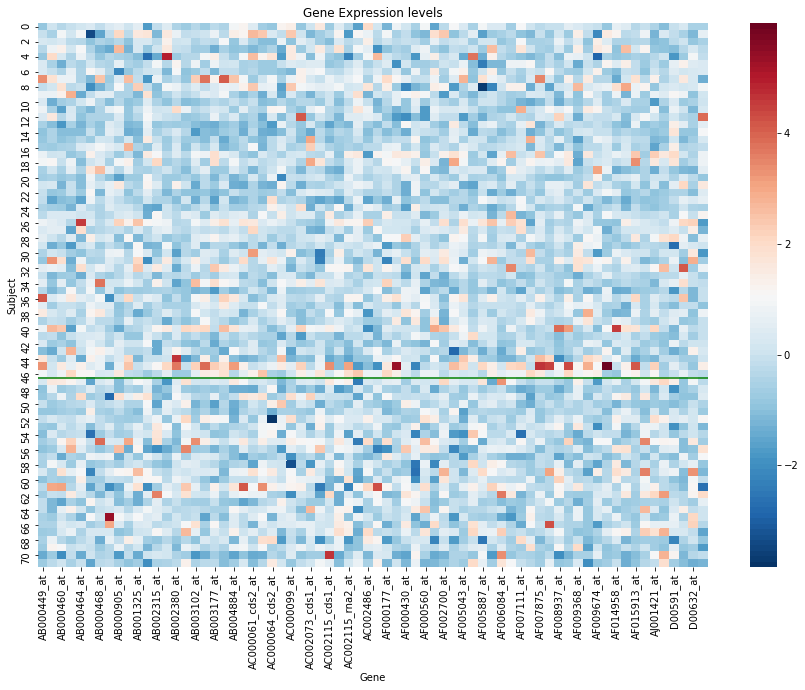

In [ ]:
#We can get all the names of the columns in our dataset by calling "columns"
column_names = data_df_norm.columns.tolist()

# We can print out the some subset of columns to see which genes they are.
start_gene_index = 30
end_gene_index = 100
column_subset = column_names[start_gene_index: end_gene_index]
print(column_subset)

# We can use this subset and make our heatmap again
plot_heatmap(data_df_norm.loc[:, column_subset], "Gene Expression levels", "Gene", "Subject", figsize=(15,10))

#Can you change the subset indices to find any differences?

SO...as you might be  discovering ots really hard to find patterns by just looking by eye! Thats why we need ML! Lets get our hands into the library sci-kit learn!

# Baseline Algorithm with SciKit-Learn
### A baseline is the simplest possible prediction we can make without randomly assigning labels.
### We can make a baseline by making a majority classifier!

THINK: Why do we need a baseline algorithm?

First, as we've learned in ML last week, we must split our data intro training and testing groups so we can see if our algorithm is actually learning patterns. Not just memorizing!

In [ ]:
# import sklearn
from sklearn.model_selection import train_test_split

# Break the dataset up into the examples (X) and their labels (y)
X = data_df.drop(columns ="label")
y = data_df.label

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# print(X_train)

#Training our baseline
### Now that we've split our data into a training set and a test set, its time to train our baseline!

First, let's use sklearn's "Dummy" classifier for our baseline. There are multiple strategies to make a baseline-- here we can use the strategy of calculating which label comes up the more frequent in the training set. Then, all "predictions" will be labeled as that label!

THINK: When will such a baseline work give us good accuracy? When will it not?

In [ ]:
# sklearn has these classifiers built in
# We're going to import the "Dummy" classifier
from sklearn.dummy import DummyClassifier

In [ ]:
# Initialize the classifier with a strategy.
# The strategy here will be using the most_frequent label as all future predictions
dummy_clf = DummyClassifier(strategy="most_frequent")

In [ ]:
# Fit the classifier to the training set
# This is the training process!! sklearn makes it super easy for us
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
# Create a list of predicted classes for each of the examples in the test set
y_predict = dummy_clf.predict(X_test)
print("Predicted test labels", y_predict)

Predicted test labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In order to find the accuracy of our classifier on the test set, we use the function score(), which takes two parameters: (1) the data of the test set, and (2) the correct labels of the test set.

It will automatically compare our predicted label with the correct label to compute the accuracy.

In [ ]:
accuracy = dummy_clf.score(X_test, y_test)
print(accuracy)

0.6111111111111112


Fantastic!! We've just implemented our first algorithm! Dont worry if accuracy might not be very high-- it is a baseline after all!

You can go back to the "Dummy Classifier" and [choose a different strategy](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) if you wish, and see how a different baseline algorithm can do.

In a few lines of code, we've:

*  Loaded our dataset
*  Picked a baseline classifier to use
* Trained our classifier on the dataset
* Tested our classifier on unseen data

Now that we have a baseline model accuracy, we can compare our future algorithms with this to make sure that we have done better than the most simple algorithm!

#END

# OPTIONAL Activities:
**Task 1:** Write your own DummyClassifier to understand how it works!

**Task 2:** Write your own confusion matrix!


## Task 1:
Now...you might be wondering how this Dummy Classifier works...let's try to write our own baseline majority classifier!

The format below is a "class object".
Don't worry too much about this format--- it just creates
something that helps us manage functions and data that relate to each other. We will use many pre-made classifiers (in this format) in the coming days. So this is for you to get used to how to call things, and gain intuition for what's happening behind the scenes!


tl;dr: Just look for ` ## FILL IN ##` and `## YOUR CODE HERE ##` sections!

In [ ]:
# This Majority Classifier will set labels for any prediction dataset to the most
# common label found during training/fit
class MajorityClassifier:
  # self.majority = None

  def fit(self, X, y ):
      # X here is the data features
      #   X not used here. Only to keep same format as other classifiers
      #   (THINK: Why don't you need X for this algorithm?)
      # y here is the data labels

      self.counts = y.value_counts() #Count how many

      if self.counts[0] > self.counts[1]:
        self.majority = 0
      else:
        self.majority = 1

      # a fancier way
      # self.majority = int(self.counts[0] < self.counts[1])

      ### YOUR CODE HERE ###

  def predict(self, X):

      if self.majority == 0:
        labeled = np.zeros(len(X))
      else:
        labeled = np.ones(len(X))

      # a fancier way
      # labeled = np.ones(len(X))*self.majority

      # labeled = ## FILL IN ##

      return labeled

  def score(self, X, y):
      # Calculate accuracy
      y_pred = self.predict(X) # Must predict first!!
      print(y_pred)

      num_correct = 0
      total = len(y)*1.0 # Need 1.0 so that we force floating calculation
      for i, label in enumerate(y_pred):
        if label == y.iloc[i]:      # use y.iloc[i] instead of y[i], otherwise use y=np.array(y) to change y from data_frame in panda to numpy array at the beginning
          num_correct += 1

      accuracy = num_correct/total

      # a fancier way
      # accuracy = (y == y_pred).sum() / total

      return accuracy

In [ ]:
mj = MajorityClassifier()
mj.fit(X_train, y_train)

y_predict = mj.predict(X_test)
accuracy = mj.score(X_test, y_test)

print("Prediction: ", y_predict)
print("My Majority Classfier has an accuracy of: ", accuracy)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
My Majority Classfier has an accuracy of:  0.6111111111111112


# Task 2: The Confusion Matrix
The code above told us how accurate the baseline was, but what if we wanted some more details about which sorts of classifications we got right and wrong? That's where the confusion matrix comes in.

We'll use the `matplotlib` library to accomplish this visualization, but we'll also use the library `seaborn` to make our visualization look a bit nicer:

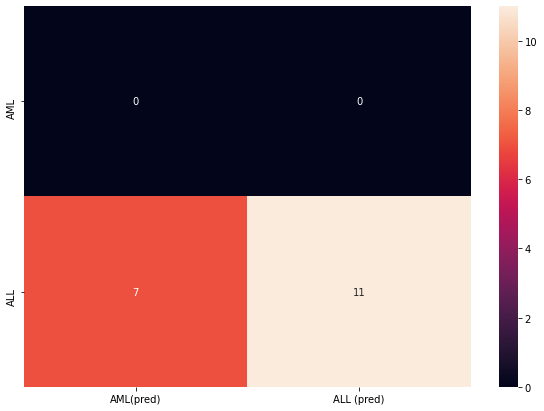

In [ ]:

#TODO: calculate confusion matrix
def confusion_matrix(y_test, y_predict):
  # Think about what goes in a confusion matrix
  # Order matters!
  matrix = np.zeros((2,2)) # Just initializing

  ### YOUR CODE HERE ###
  matrix[0,0] = ((y_test == y_predict) & (y_test == 1)).sum()   # & means two conditions need to be satisfied at the same time
  matrix[0,1] = ((y_test != y_predict) & (y_test == 0)).sum()
  matrix[1,0] = ((y_test != y_predict) & (y_test == 1)).sum()
  matrix[1,1] = ((y_test == y_predict) & (y_test == 0)).sum()

  return matrix

confusion_mat = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(confusion_mat):
  cm_df = pd.DataFrame(
      confusion_mat,
      index = [idx for idx in ['AML', 'ALL']],
      columns = [col for col in ['AML(pred)', 'ALL (pred)']])
  plt.figure(figsize = (10,7))

  sns.heatmap(cm_df, annot=True) #draw the matrix


plot_confusion_matrix(confusion_mat)


[[11  0]
 [ 7  0]]
[[1. 1.]
 [1. 1.]]


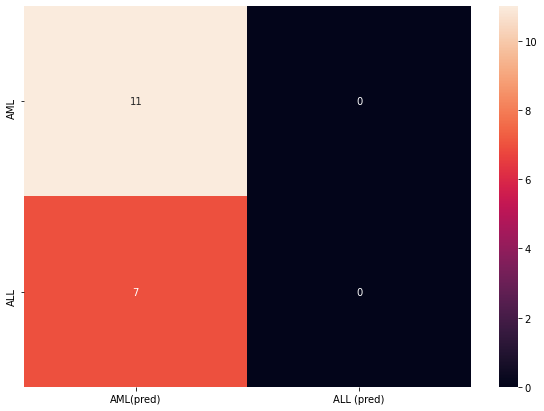

In [ ]:
from sklearn.metrics import confusion_matrix

#TODO: calculate confusion matrix  MAKE SURE CONCEPT IS EXPLAINED FIRST IN ML LECTURE

confusion_matrix = confusion_matrix(y_test,y_predict)
print(confusion_matrix)
print(np.ones((2,2)))
cm_df = pd.DataFrame(
    confusion_matrix,
    index = [idx for idx in ['AML', 'ALL']],
    columns = [col for col in ['AML(pred)', 'ALL (pred)']])
plt.figure(figsize = (10,7))

sns.heatmap(cm_df, annot=True) #draw the matrix


Our confusion matrix in this case is a 2x2 table, because there are 2 different possible classes for each patient (AML or ALL). The columns tell us what class we predicted, whereas the rows tell us what the actual class is.

*Because we randomly split the data set, your confusion matrix might look different from someone else's in the class.*
